In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
dataset = pd.read_csv('california_housing_test.csv')

In [6]:
df=dataset['total_rooms']

In [7]:
df

0       3885.0
1       1510.0
2       3589.0
3         67.0
4       1241.0
         ...  
2995    1450.0
2996    5257.0
2997     956.0
2998      96.0
2999    1765.0
Name: total_rooms, Length: 3000, dtype: float64

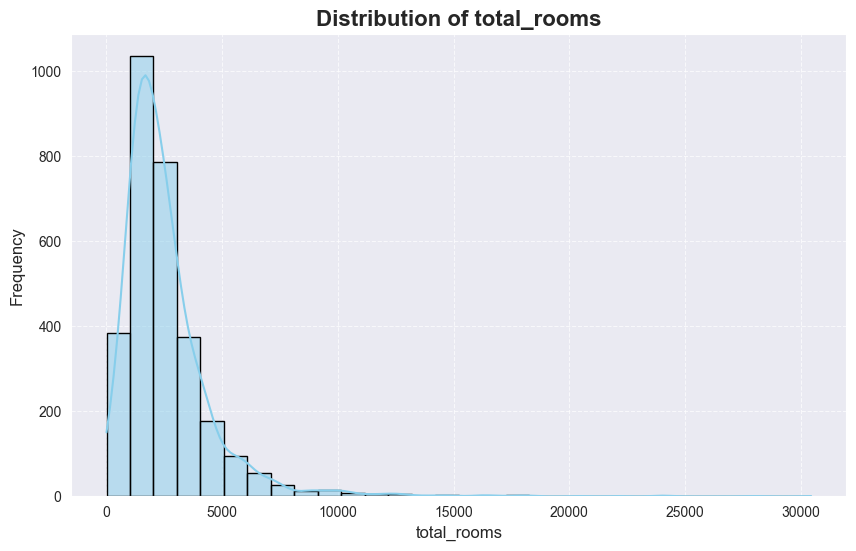

In [8]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
sns.histplot(df, kde=True, bins=30, color='skyblue', edgecolor='black')

plt.title(f'Distribution of total_rooms', fontsize=16, weight='bold')
plt.xlabel('total_rooms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

In [9]:
#z-score

outlier=[]
def detect_outlier(data):
  threshold=3   # 3rd std devistion
  mean=np.mean(data)  # mean
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if(np.abs(z_score)>threshold):
      outlier.append(i)
  return outlier

In [10]:
print("outliers from dataset are :",detect_outlier(df))


outliers from dataset are : [16181.0, 9998.0, 9849.0, 9404.0, 24121.0, 20354.0, 12779.0, 10722.0, 11976.0, 9311.0, 10212.0, 18123.0, 11654.0, 11635.0, 27870.0, 9594.0, 14291.0, 23915.0, 15025.0, 12128.0, 10110.0, 10265.0, 12689.0, 18132.0, 10950.0, 21988.0, 12396.0, 10665.0, 12045.0, 16590.0, 9488.0, 9376.0, 16289.0, 9482.0, 9738.0, 14684.0, 10214.0, 12467.0, 11021.0, 10395.0, 10111.0, 12806.0, 30450.0, 17470.0, 11251.0, 10282.0, 13180.0, 10088.0, 9559.0, 9959.0, 13802.0]


In [11]:
# IQR Technoque
# sorting
# calculate Q1 and Q3
# IQR=(Q3-Q1)
# find the lower fence(q1-1.5(IQR))
# find the heigher fence(q3-1.5(IQR))

In [12]:
df=sorted(df)   # sorting

In [13]:
print(df)


[6.0, 16.0, 18.0, 19.0, 21.0, 25.0, 32.0, 32.0, 38.0, 40.0, 41.0, 42.0, 45.0, 48.0, 48.0, 49.0, 60.0, 66.0, 67.0, 74.0, 83.0, 87.0, 90.0, 95.0, 96.0, 96.0, 97.0, 99.0, 104.0, 105.0, 106.0, 107.0, 110.0, 114.0, 118.0, 120.0, 126.0, 141.0, 142.0, 142.0, 156.0, 158.0, 161.0, 172.0, 172.0, 180.0, 185.0, 200.0, 202.0, 204.0, 205.0, 212.0, 215.0, 224.0, 225.0, 238.0, 240.0, 254.0, 255.0, 265.0, 277.0, 282.0, 284.0, 305.0, 307.0, 308.0, 312.0, 314.0, 314.0, 320.0, 321.0, 321.0, 322.0, 322.0, 324.0, 325.0, 335.0, 337.0, 349.0, 353.0, 354.0, 361.0, 362.0, 365.0, 365.0, 367.0, 369.0, 371.0, 382.0, 388.0, 392.0, 393.0, 396.0, 396.0, 397.0, 404.0, 407.0, 409.0, 410.0, 414.0, 418.0, 423.0, 432.0, 440.0, 442.0, 443.0, 444.0, 446.0, 446.0, 455.0, 470.0, 472.0, 477.0, 479.0, 483.0, 483.0, 488.0, 492.0, 493.0, 495.0, 500.0, 500.0, 505.0, 505.0, 512.0, 513.0, 515.0, 520.0, 521.0, 523.0, 530.0, 530.0, 531.0, 532.0, 535.0, 550.0, 552.0, 554.0, 557.0, 559.0, 561.0, 563.0, 564.0, 568.0, 570.0, 570.0, 572.0,

In [14]:
q1,q3=np.percentile(df,[25,75])
print(q1,q3)

1401.0 3129.0


In [15]:
iqr=q3-q1
print(iqr)

1728.0


In [16]:
# finding lower and upper fence
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)

-1191.0 5721.0


C:\Users\karti\AppData\Local\Temp\ipykernel_8132\506619804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, palette='Set2', width=0.5)


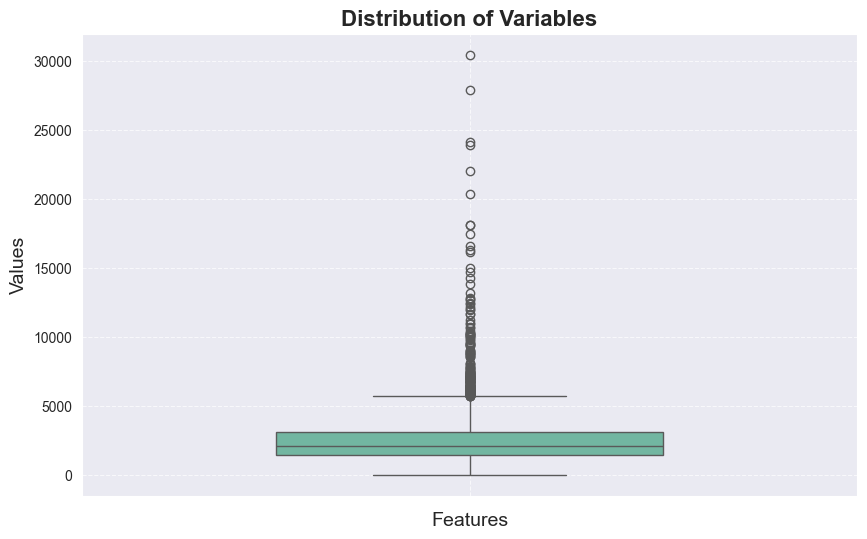

In [17]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, palette='Set2', width=0.5)

plt.title('Distribution of Variables', fontsize=16, fontweight='bold')

plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()